Firstly, I loaded all the necessary packages.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, zero_one_loss
import matplotlib.pyplot as plt

The first step is to load two datasets. And I need to set the x and y values for both the training and testing sets.
Afterwards, I set a 5-fold cross validation and the tuning parameter 'k' is from 1 to 20.
Afterwards, I used the knn method in sklearn to fit the model separately with each k value. And I calculated the zero-one loss for each model.
Finally, I drew the estimated average test error.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

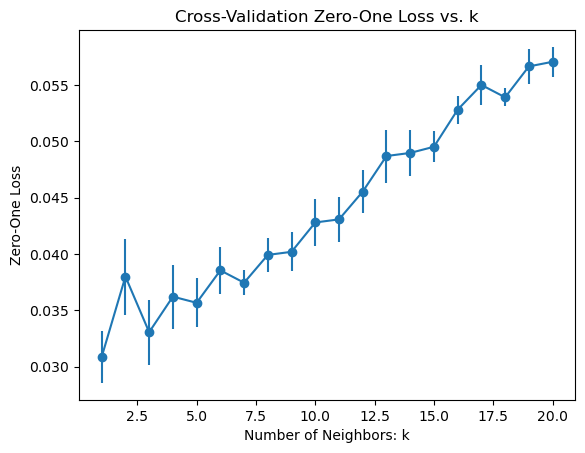

In [3]:
train_data = pd.read_csv('zip.train', header=None, sep=' ')
test_data = pd.read_csv('zip.test', header=None, sep=' ')

# Drop the last column
train_data.dropna(axis=1, inplace=True)

train_y = train_data.iloc[:, 0]
train_X = train_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]
test_X = test_data.iloc[:, 1:]

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1) # according to require, n_splits=5

# Set k value from 1 to 20
k_values = list(range(1,21))
mean_errors = [] # list of mean of errors
std_errors = [] # list of mean of std

# Perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_errors = []
    for train_index, val_index in kf.split(train_X):
        X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        knn.fit(X_train, y_train) # k-NN method
        y_pred = knn.predict(X_val)
        fold_errors.append(zero_one_loss(y_val, y_pred)) # zero-one loss
    mean_errors.append(np.mean(fold_errors))
    std_errors.append(np.std(fold_errors) / np.sqrt(len(fold_errors)))

# Plot the cross-validation error as a function of k
plt.errorbar(k_values, mean_errors, yerr=std_errors, fmt='-o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Zero-One Loss')
plt.title('Cross-Validation Zero-One Loss vs. k')
plt.show()

From the above picture, we can see that the effect is good when k=1 and k=3. After calculation, I found that when k=3, the loss is the smallest. (Actually, the difference between the two is not very significant).
So, I fitted the model at k=3 and calculated a fusion matrix and an estimate of conditional test error.

In [7]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(train_X, train_y)

test_predictions = knn_final.predict(test_X)
conf_matrix = confusion_matrix(test_y, test_predictions)
test_error = zero_one_loss(test_y, test_predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("Test Zero-One Loss:", test_error)

Confusion Matrix:
[[355   0   3   0   0   0   0   0   0   1]
 [  0 258   0   0   3   0   2   1   0   0]
 [  8   0 183   1   1   0   0   2   3   0]
 [  3   0   2 153   0   6   0   1   0   1]
 [  0   2   0   0 183   2   2   2   1   8]
 [  5   0   3   3   0 144   0   0   1   4]
 [  3   1   1   0   2   0 163   0   0   0]
 [  0   1   1   1   4   0   0 138   1   1]
 [  4   0   3   4   0   1   0   1 151   2]
 [  2   0   0   0   3   0   0   4   0 168]]
Test Zero-One Loss: 0.05530642750373693


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
